# <center>Laboratorium 12<br>Metody Numeryczne</center>    


Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

**Cel zajęć:** Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania równań różniczkowych
zwyczajnych. Będziemy rozpatrywać równania różniczkowe postaci
$$\dot{x}(t) = f(x(t), t)$$
gdzie:

$x(t) \in \mathbb{R}^n$,

$t \ge 0$ 


z warunkiem początkowym $x(0) = x0$

Jest to tak zwany problem początkowy (problem Cauchy’ego) dla równań różniczkowych zwyczajnych.

**Zadanie 1.**  
Za pomocą funkcji [solve_ivp](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy.integrate.solve_ivp) przy wykorzystaniu dwóch metod **RK45** i **RK23** rozwiąż wszystkie równania z poprzedniego laboratorium i porównaj wyniki z zaimplementowaną metodą Eulera w przód.

##### **zad 1** (z poprzedniego lab)
Rozwiąż równanie:
$\dot{x}(t)=\frac{x+t}{x-t}$, 
$ x(0)=1$ (równanie to posiada rozwiązanie dokładne: 
$x(t)=t+\sqrt{1+2t^2}$). 

d:\metody_numeryczne\laboratorium-13-MichalMichniak\main.py:24: VisibleDeprecationWarning: Creating an ndarray from nested sequences exceeding the maximum number of dimensions of 32 is deprecated. If you mean to do this, you must specify 'dtype=object' when creating the ndarray.
  dy = np.array([j(i,y[-1]) * dt for j in fun])
d:\metody_numeryczne\laboratorium-13-MichalMichniak\main.py:26: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(y)


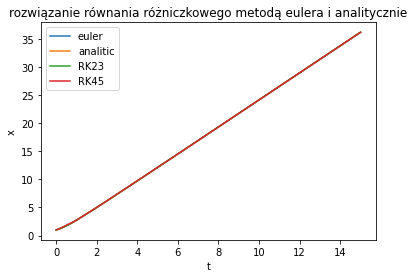

In [111]:
import main
import numpy as np
import scipy.integrate
import matplotlib.pyplot as plt
f = lambda t,x: (x+t)/(x-t)
t2 = np.linspace(0,15,10000)
y = main.solve_euler(np.array([lambda t2,x: ((x+t2)/(x-t2))]),t2,np.array([1]))
plt.plot(t2,y, label = "euler")
plt.plot(t2, t2+np.sqrt(1+2*t2**2), label = "analitic")
RK23 = scipy.integrate.solve_ivp(f, (0, 15), np.array([1]), vectorized=True, method="RK23")
t_rk23 = RK23.t.transpose()
plt.plot(t_rk23, RK23.y[0], label = "RK23")
RK45 = scipy.integrate.solve_ivp(f, (0, 15), np.array([1]), vectorized=True, method="RK45")
t_rk45 = RK45.t.transpose()
plt.plot(t_rk45, RK45.y[0], label = "RK45")
plt.legend()
plt.xlabel("t")
plt.ylabel("x")
plt.legend()
plt.title("rozwiązanie równania różniczkowego metodą eulera i analitycznie")
plt.show()

d:\metody_numeryczne\laboratorium-13-MichalMichniak\main.py:24: VisibleDeprecationWarning: Creating an ndarray from nested sequences exceeding the maximum number of dimensions of 32 is deprecated. If you mean to do this, you must specify 'dtype=object' when creating the ndarray.
  dy = np.array([j(i,y[-1]) * dt for j in fun])
d:\metody_numeryczne\laboratorium-13-MichalMichniak\main.py:26: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(y)


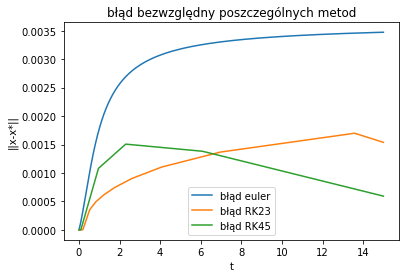

In [112]:
f = lambda t,x: (x+t)/(x-t)
f_real = lambda t: t+np.sqrt(1+2*t**2)
t2 = np.linspace(0,15,10000)
y = main.solve_euler(np.array([lambda t2,x: ((x+t2)/(x-t2))]),t2,np.array([1]))
y2 = t2+np.sqrt(1+2*t2**2)
err = abs(y.T-y2)
plt.plot(t2,err.T, label = "błąd euler")
plt.plot(t_rk23,abs(RK23.y[0] - f_real(t_rk23)) , label = "błąd RK23")
plt.plot(t_rk45, abs(RK45.y[0] - f_real(t_rk45)), label = "błąd RK45")
plt.legend()
plt.title("błąd bezwzględny poszczególnych metod")
plt.xlabel("t")
plt.ylabel("||x-x*||")
plt.show()

##### **zad 2** (z poprzedniego lab)
$$
x(t)=\left[\begin{matrix}
cos(t)\\
sin(t)\\
-sin(t)\\
cos(t)
\end{matrix}\right].
$$  


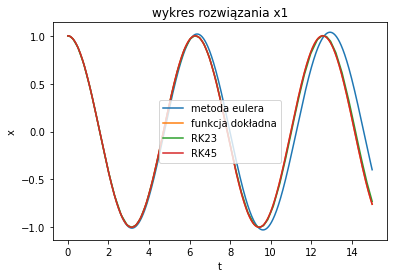

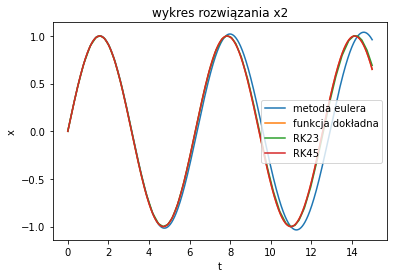

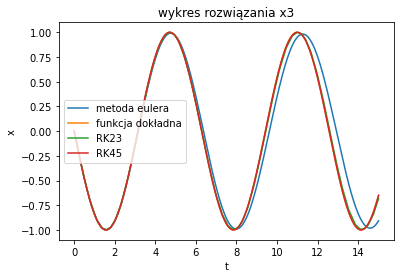

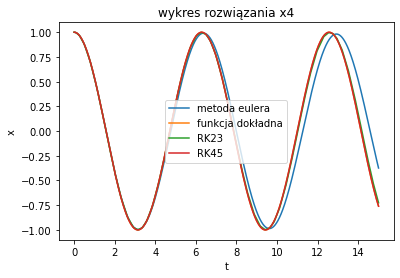

In [113]:
t = np.linspace(0,15,10000)
func = np.array([lambda t,y: y[2],lambda t,y: y[3],lambda t,y: -1*y[0]/(y[0]**2+y[1]**2)**(3/2),lambda t,y: -1*y[1]/(y[0]**2+y[1]**2)**(3/2)])
f_real = lambda t: np.array([np.cos(t),np.sin(t),-np.sin(t),np.cos(t)])
y = main.solve_euler(func,t,np.array([1,0,0,1]))
def wraper(func):
    def f(t,*args):
        vect = []
        for i in func:
            vect.append(i(t,np.array(args[0])))
        return np.array(vect)
    return f
RK23 = scipy.integrate.solve_ivp(wraper(func), (0, 15), np.array([1,0,0,1]), vectorized=True, method="RK23")
t_rk23 = RK23.t.transpose()
RK45 = scipy.integrate.solve_ivp(wraper(func), (0, 15), np.array([1,0,0,1]), vectorized=True, method="RK45",t_eval =t,max_step = 1e-2)
t_rk45 = RK45.t.transpose()


plt.plot(t,y[:,0],label="metoda eulera")
plt.plot(t,np.cos(t),label="funkcja dokładna")
plt.plot(t_rk23, RK23.y[0], label = "RK23")
plt.plot(t_rk45, RK45.y[0], label = "RK45")
plt.title("wykres rozwiązania x1")
plt.xlabel("t")
plt.ylabel("x")
plt.legend()
plt.show()



plt.plot(t,y[:,1],label="metoda eulera")
plt.plot(t,np.sin(t),label="funkcja dokładna")
plt.plot(t_rk23, RK23.y[1], label = "RK23")
plt.plot(t_rk45, RK45.y[1], label = "RK45")
plt.title("wykres rozwiązania x2")
plt.xlabel("t")
plt.ylabel("x")
plt.legend()
plt.show()



plt.plot(t,y[:,2],label="metoda eulera")
plt.plot(t,-np.sin(t),label="funkcja dokładna")
plt.plot(t_rk23, RK23.y[2], label = "RK23")
plt.plot(t_rk45, RK45.y[2], label = "RK45")
plt.title("wykres rozwiązania x3")
plt.xlabel("t")
plt.ylabel("x")
plt.legend()
plt.show()



plt.plot(t,y[:,3],label="metoda eulera")
plt.plot(t,np.cos(t),label="funkcja dokładna")
plt.plot(t_rk23, RK23.y[3], label = "RK23")
plt.plot(t_rk45, RK45.y[3], label = "RK45")
plt.title("wykres rozwiązania x4")
plt.xlabel("t")
plt.ylabel("x")
plt.legend()
plt.show()

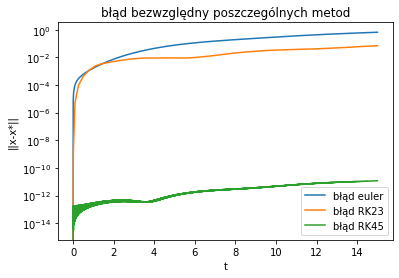

In [114]:
import numpy.linalg
erreul =abs(np.array([numpy.linalg.norm(y.T[:,i]-f_real(t)[:,i]) for i in range(len(y.T[0,:]))]))
plt.plot(t2,erreul, label = "błąd euler")
err23 = abs(np.array([numpy.linalg.norm(RK23.y[:,i] - f_real(t_rk23)[:,i]) for i in range(len(RK23.y[0]))]))
plt.plot(t_rk23, err23, label = "błąd RK23")
err45 = abs(np.array([numpy.linalg.norm(RK45.y[:,i] - f_real(t_rk45)[:,i]) for i in range(len(RK45.y[0]))]))
plt.plot(t_rk45, err45, label = "błąd RK45")
plt.legend()
plt.title("błąd bezwzględny poszczególnych metod")
plt.xlabel("t")
plt.ylabel("||x-x*||")
plt.yscale("log")
plt.show()

##### **zad 3**
$\mathbf{A}$ dana jest wzorem:  
$$
\mathbf{A}=\left[\begin{matrix}
-667 & 333 \\
 666 & -334
\end{matrix}\right]
$$

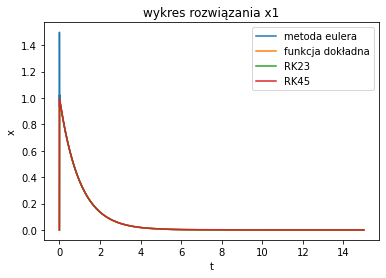

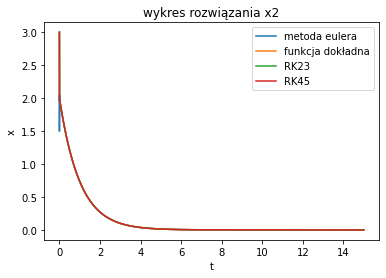

In [126]:
t = np.linspace(0,15,10000)
func = np.array([lambda t,y: -667*y[0]+333*y[1], lambda t,y: 666*y[0]-334*y[1]])
xfun = lambda t : np.exp(-t) - np.exp(-1000*t)
yfun = lambda t: 2*np.exp(-t) + np.exp(-1000*t)
f_real = lambda t: np.array([xfun(t),yfun(t)])
y = main.solve_euler(func,t,np.array([0,3]))
def wraper(func):
    def f(t,*args):
        vect = []
        for i in func:
            vect.append(i(t,np.array(args[0])))
        return np.array(vect)
    return f
RK23 = scipy.integrate.solve_ivp(wraper(func), (0, 15), np.array([0,3]), vectorized=True, method="RK23")
t_rk23 = RK23.t.transpose()
RK45 = scipy.integrate.solve_ivp(wraper(func), (0, 15), np.array([0,3]), vectorized=True, method="RK45",t_eval =t,max_step = 1e-2)
t_rk45 = RK45.t.transpose()


plt.plot(t,y[:,0],label="metoda eulera")
plt.plot(t,f_real(t)[0],label="funkcja dokładna")
plt.plot(t_rk23, RK23.y[0], label = "RK23")
plt.plot(t_rk45, RK45.y[0], label = "RK45")
plt.title("wykres rozwiązania x1")
plt.xlabel("t")
plt.ylabel("x")
plt.legend()
plt.show()



plt.plot(t,y[:,1],label="metoda eulera")
plt.plot(t,f_real(t)[1],label="funkcja dokładna")
plt.plot(t_rk23, RK23.y[1], label = "RK23")
plt.plot(t_rk45, RK45.y[1], label = "RK45")
plt.title("wykres rozwiązania x2")
plt.xlabel("t")
plt.ylabel("x")
plt.legend()
plt.show()


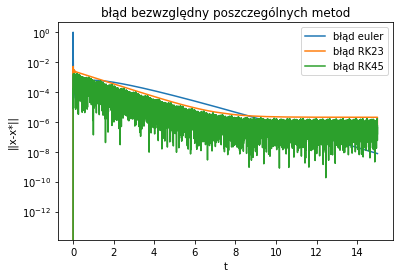

In [127]:
import numpy.linalg
erreul =abs(np.array([numpy.linalg.norm(y.T[:,i]-f_real(t)[:,i]) for i in range(len(y.T[0,:]))]))
plt.plot(t2,erreul, label = "błąd euler")
err23 = abs(np.array([numpy.linalg.norm(RK23.y[:,i] - f_real(t_rk23)[:,i]) for i in range(len(RK23.y[0]))]))
plt.plot(t_rk23, err23, label = "błąd RK23")
err45 = abs(np.array([numpy.linalg.norm(RK45.y[:,i] - f_real(t_rk45)[:,i]) for i in range(len(RK45.y[0]))]))
plt.plot(t_rk45, err45, label = "błąd RK45")
plt.legend()
plt.title("błąd bezwzględny poszczególnych metod")
plt.xlabel("t")
plt.ylabel("||x-x*||")
plt.yscale("log")
plt.show()


#### **zad 4** Orbita arenstrofa

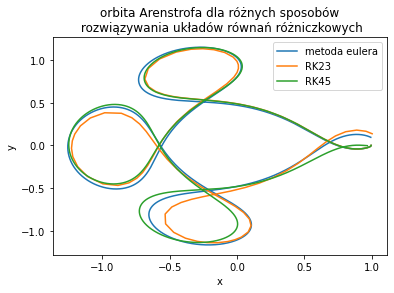

In [135]:
mi = 0.012277471
mi_prim = 1 - mi
T = 17.0652165601579625588917206249
t = np.linspace(0,T,1000000)
D1 = lambda x1,x3: ((x1+mi)**2 + x3**2)**(3/2)
D2 = lambda x1,x3: ((x1-mi_prim)**2 + x3**2)**(3/2)
func = np.array([(lambda t,y: y[1]),(lambda t,y: y[0] + 2*y[3] - (mi_prim*(y[0]+mi)/D1(y[0],y[2])) - (mi*(y[0] - mi_prim)/D2(y[0],y[2]))),(lambda t,y: y[3]),(lambda t,y: y[2] - 2*y[1] - (mi_prim*(y[2])/D1(y[0],y[2])) - (mi*(y[2])/D2(y[0],y[2])))])

y = main.solve_euler(func,t,np.array([0.994,0,0, - 2.00158510637908252240537862224]))
RK23 = scipy.integrate.solve_ivp(wraper(func), (0, T), np.array([0.994,0,0, - 2.00158510637908252240537862224]), vectorized=True, method="RK23")
t_rk23 = RK23.t.transpose()
RK45 = scipy.integrate.solve_ivp(wraper(func), (0, T), np.array([0.994,0,0, - 2.00158510637908252240537862224]), vectorized=True, method="RK45",max_step = 1e-2)
t_rk45 = RK45.t.transpose()



plt.plot(y[:,0],y[:,2],label="metoda eulera")
plt.plot(RK23.y[0], RK23.y[2], label = "RK23")
plt.plot(RK45.y[0], RK45.y[2], label = "RK45")
plt.title("orbita Arenstrofa dla różnych sposobów\n rozwiązywania układów równań różniczkowych")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()



## Wnioski
Zgodnie z oczekiwaniami metoda RK45 jest najlepszą metodą spośród metod używanych na labolatorium gdyż używa metody rungego kukty 4 rzędu z estymatorem błędu rzędu 5. Jest to najwyższy rząd w stosowanych na laboratorium metodach oraz najbardziej złożony obliczeniowo. w porównaniu do metody eulera wieloetapowe metody Rungego-Kukty z krokiem adaptacyjnym są o wiele dokładniejsze gdyż kożystają nie tylko z wartości na krańcach przedziału kroku ale i kożystają z wartości pomiędzy(etapy). Dodatkowo nadaje się do dokładniejszego wyznaczania rozwiązań dla problemu trzech ciał oraz symulowania skomplikowanych symulacji np. wyznaczania orbit obiektów(orbita Arenstorfa). Należy jednak pamiętać że istnieją dokładniejsze metody wyznaczania rozwiązań układów równań różniczkowych takie jak np. metoda Dormana-Price'a 853, lecz błąd popełniany przez metody RK45 i RK23 jest na zadowalającym poziomie (dla krótkich symulacji). Labolatorium przeszło bezproblemowo i nie miałem żadnych trudności z rozwiązaniem zadań.

**Bibliografia**

1. J. C. Butcher. Numerical Methods for Ordinary Differential Equations. John Wiley and Sons, Ltd., 2003.
2. Z. Fortuna, B. Macukow, and J. Wąsowski. Metody numeryczne. WNT Warszawa, 1982.
3. E. Hairer, S.P. Nørsett, and G. Wanner. Solving Ordinary Differential Equations: I Nonstiff problems. Springer, 2 edition, 2000.
4. W. Mitkowski. Równania macierzowe i ich zastosowania. Wydawnictwa AGH, Kraków,2 edition, 2007.
5. A. Ralston. Wstęp do analizy numerycznej. PWN, Warszawa, 1965.
6. L. F. Shampine, I. Gladwell, and S. Thompson. Solving ODEs with MATLAB. Cambridge University Press, 2003.
7. Stoer, J., Burlirsch, R., 1980: Wstêp do metod numerycznych, tom 2. PWN Warszawa.
